# imports

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sb
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Reading and processing data

In [2]:
Ratings = pd.read_csv("ratings.csv")

In [3]:
Ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [4]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [5]:
Ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
Ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [39]:
Ratings["rating"].value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

In [43]:
group1 = Ratings.loc[Ratings["rating"] == 0.5]
group2 = Ratings.loc[Ratings["rating"] == 1.0]
group3 = Ratings.loc[Ratings["rating"] == 1.5]
group4 = Ratings.loc[Ratings["rating"] == 2.0]
group5 = Ratings.loc[Ratings["rating"] == 2.5]
group6 = Ratings.loc[Ratings["rating"] == 3.0]
group7 = Ratings.loc[Ratings["rating"] == 3.5]
group8 = Ratings.loc[Ratings["rating"] == 4.0]
group9 = Ratings.loc[Ratings["rating"] == 4.5]
group10 = Ratings.loc[Ratings["rating"] == 5.0]



print(len(group1))
print(len(group2))
print(len(group3))
print(len(group4))
print(len(group5))
print(len(group6))
print(len(group7))
print(len(group8))
print(len(group9))
print(len(group10))


393068
776815
399490
1640868
1262797
4896928
3177318
6639798
2200539
3612474


In [44]:
sample_size = 100000
total = len(Ratings)
group_percentage = sample_size / total

group1_sample = group1.sample(round(group_percentage*len(group1)))
group2_sample = group2.sample(round(group_percentage*len(group2)))
group3_sample = group3.sample(round(group_percentage*len(group3)))
group4_sample = group4.sample(round(group_percentage*len(group4)))
group5_sample = group5.sample(round(group_percentage*len(group5)))
group6_sample = group6.sample(round(group_percentage*len(group6)))
group7_sample = group7.sample(round(group_percentage*len(group7)))
group8_sample = group8.sample(round(group_percentage*len(group8)))
group9_sample = group9.sample(round(group_percentage*len(group9)))
group10_sample = group10.sample(round(group_percentage*len(group10)))


stratified_sample = pd.concat([group1_sample,group2_sample,group3_sample,group4_sample,group5_sample,group6_sample,group7_sample,group8_sample,group9_sample,group10_sample])
stratified_sample

,userId,movieId,rating,timestamp
22189820,144308,8665,0.5,1491018902
7274634,47153,188093,0.5,1561597493
18886662,122455,786,0.5,1143821500
19954321,129723,1250,0.5,1446792763
20838290,135534,8387,0.5,1145533975
...,...,...,...,...
9690519,62926,112852,5.0,1454641563
24796425,161172,480,5.0,1159536078
19528192,126788,3033,5.0,976325364
16781197,108867,3033,5.0,993439086


array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'timestamp'}>]], dtype=object)

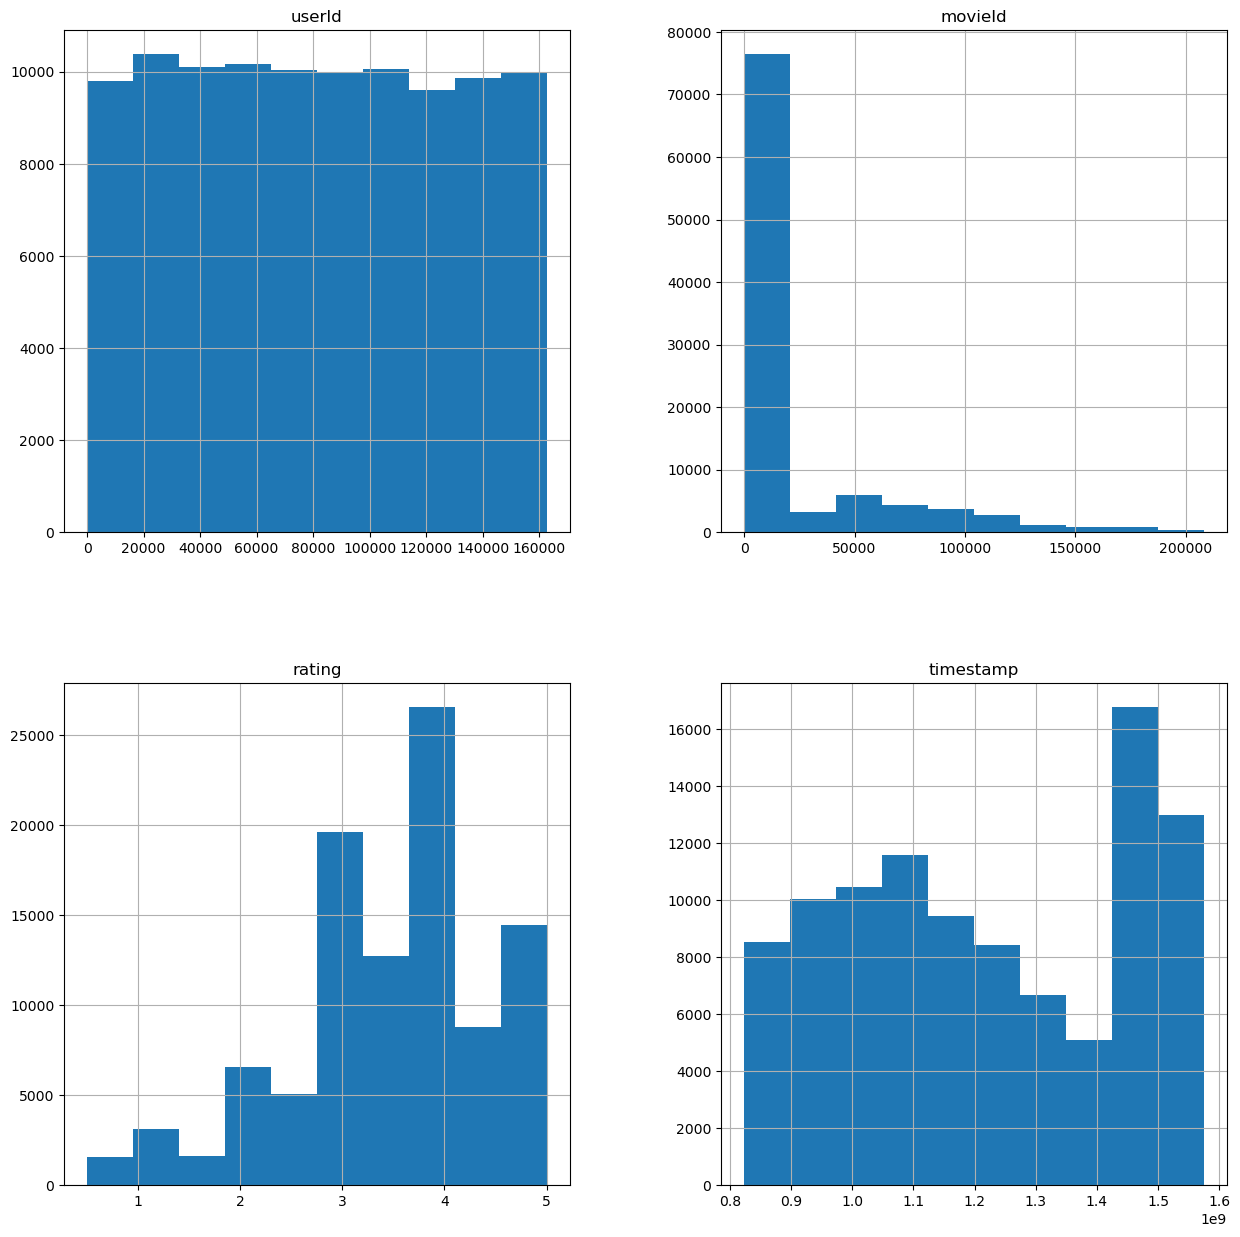

In [46]:
stratified_sample.hist(figsize=(15,15))

In [7]:
Movies = pd.read_csv("movies.csv")

In [8]:
Movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [9]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
Movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
Movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [38]:
Movies["genres"].value_counts()

Drama                                   9056
Comedy                                  5674
(no genres listed)                      5062
Documentary                             4731
Comedy|Drama                            2386
                                        ... 
Action|Adventure|Crime|Fantasy             1
Drama|Film-Noir|Musical|Thriller           1
Action|Drama|Horror|Mystery                1
Adventure|Comedy|Sci-Fi|Thriller|War       1
Comedy|Horror|Mystery|Sci-Fi|Western       1
Name: genres, Length: 1639, dtype: int64

corrolation and heat map

userId      -0.004413
movieId      1.000000
rating      -0.009216
timestamp    0.520900
Name: movieId, dtype: float64


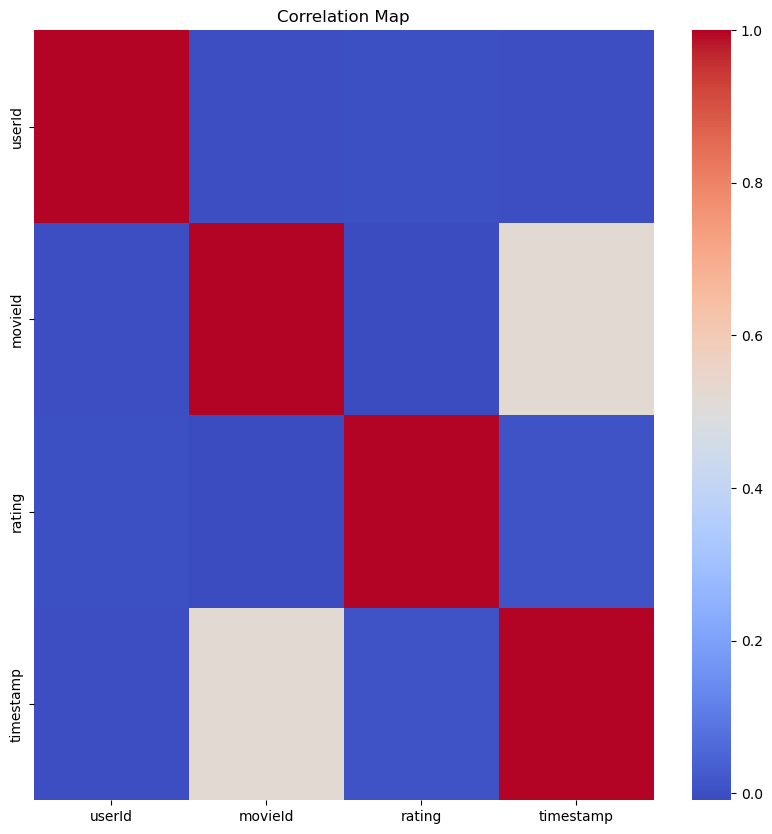

In [12]:
corr_matrix = Ratings.corr()

print(corr_matrix['movieId'])

plt.figure(figsize=(10, 10))
sb.heatmap(corr_matrix, cmap='coolwarm', fmt=".9f")
plt.title('Correlation Map')
plt.show()

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features_for_clustering = Movies[['genres']].copy()  # Create a copy explicitly
features_for_clustering['genres'] = features_for_clustering['genres'].astype('category').cat.codes
X = StandardScaler().fit_transform(features_for_clustering)

k_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
Movies['cluster'] = kmeans.fit_predict(X)

# Display the clustered movies
for cluster_id in range(k_clusters):
    cluster_movies = Movies[Movies['cluster'] == cluster_id]
    print(f"Cluster {cluster_id + 1}:")
    print(cluster_movies[['title', 'genres']])
    print("\n")


Cluster 1:
                              title                               genres
13                     Nixon (1995)                                Drama
16     Sense and Sensibility (1995)                        Drama|Romance
21                   Copycat (1995)  Crime|Drama|Horror|Mystery|Thriller
23                    Powder (1995)                         Drama|Sci-Fi
24         Leaving Las Vegas (1995)                        Drama|Romance
...                             ...                                  ...
62410        Rimsky-Korsakov (1953)                                Drama
62413                Liberté (2019)                                Drama
62414   The Carpet of Horror (1962)                         Crime|Horror
62418                     We (2018)                                Drama
62419     Window of the Soul (2001)                          Documentary

[29037 rows x 2 columns]


Cluster 2:
                             title  \
0                 Toy Story (1995)  

# Building search engine

 cleaning movie titles using regex

function to go through all titles and remove any thing isn't a letter or number

In [14]:
def Clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

take the title column go through ecah item in it and pass them into this title function and add them a new column named Clean_title

In [15]:
Movies["Clean_title"] = Movies["title"].apply(Clean_title)

data after clean

In [16]:
Movies

,movieId,title,genres,cluster,Clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,2,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,4,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,4,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,4,Father of the Bride Part II 1995
...,...,...,...,...,...
62418,209157,We (2018),Drama,0,We 2018
62419,209159,Window of the Soul (2001),Documentary,0,Window of the Soul 2001
62420,209163,Bad Poems (2018),Comedy|Drama,4,Bad Poems 2018
62421,209169,A Girl Thing (2001),(no genres listed),3,A Girl Thing 2001


creating TFIDF matrix

convert movie title into set of numbers to find the most similar to what is searched by using term frequency matrix doing inverse document frequency to find unique terms and make vectors for each movie using ngram range to ngram which is group of two words

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer = TfidfVectorizer(ngram_range=(1,2))
TFIDF = Vectorizer.fit_transform(Movies["Clean_title"])

Creating the search function

find the similarity of the term we enter to the similarity in other terms in the dataset we have using cosine_similarity and numby and find the  five tittle with the highest similarity and show them using their indicies

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def search(title):
    title = Clean_title(title)
    Query_vec = Vectorizer.transform([title])
    Similarity = cosine_similarity(Query_vec, TFIDF).flatten()
    Indices = np.argpartition(Similarity, -5)[-5:]
    Results = Movies.iloc[Indices].iloc[::-1]
    
    return Results

interactive search box using IPython.display

In [19]:
from IPython.display import display

movie_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)

movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(search(title))

movie_input.observe(on_type, names='value')

display(movie_input, movie_list)

Text(value='Toy Story', description='Movie Title:')

Output()

# Creating the recomendation system

find the users who liked the entered movie and find the other movies they liked

In [20]:
movie_id = 1

find the other movies the used liked the entered movie and rated them above 4 

In [21]:
similar_users = Ratings[(Ratings["movieId"] == movie_id) & (Ratings["rating"] > 4)]["userId"].unique()

In [22]:
similar_user_recs = Ratings[(Ratings["userId"].isin(similar_users)) & (Ratings["rating"] > 4)]["movieId"]

In [23]:
similar_user_recs

5101            1
5105           34
5111          110
5114          150
5127          260
            ...  
24998854    60069
24998861    67997
24998876    78499
24998884    81591
24998888    88129
Name: movieId, Length: 1358326, dtype: int64

show the movies the got 10% or higher that the users liked

In [24]:
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

similar_user_recs = similar_user_recs[similar_user_recs > .10]

In [25]:
similar_user_recs

1        1.000000
318      0.445607
260      0.403770
356      0.370215
296      0.367295
           ...   
953      0.103053
551      0.101195
1222     0.100876
745      0.100345
48780    0.100186
Name: movieId, Length: 113, dtype: float64

find the percentage of the regular people out side similar people liked this movie

In [26]:
all_users = Ratings[(Ratings["movieId"].isin(similar_user_recs.index)) & (Ratings["rating"] > 4)]

In [27]:
all_users

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
29,1,4973,4.5,1147869080
48,1,7361,5.0,1147880055
72,2,110,5.0,1141416589
76,2,260,5.0,1141417172
...,...,...,...,...
25000062,162541,5618,4.5,1240953299
25000065,162541,5952,5.0,1240952617
25000078,162541,7153,5.0,1240952613
25000081,162541,7361,4.5,1240953484


find the movie people similar and not similar to us liked it and recomend it and the movie must be higly recomended by the people who watched it

In [28]:
all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())

In [29]:
all_user_recs

318      0.342220
296      0.284674
2571     0.244033
356      0.235266
593      0.225909
           ...   
551      0.040918
50872    0.039111
745      0.037031
78499    0.035131
2355     0.025091
Name: movieId, Length: 113, dtype: float64

compare the percentages to make a recomendation score using pandas concate method to combine both recs we have

In [30]:
rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
rec_percentages.columns = ["similar", "all"]

In [31]:
rec_percentages

,similar,all
1,1.000000,0.124728
318,0.445607,0.342220
260,0.403770,0.222207
356,0.370215,0.235266
296,0.367295,0.284674
...,...,...
953,0.103053,0.045792
551,0.101195,0.040918
1222,0.100876,0.066877
745,0.100345,0.037031


create the score

In [32]:
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

sort the recomendation using pandas sort value method desending

In [33]:
rec_percentages = rec_percentages.sort_values("score", ascending=False)

In [34]:
rec_percentages

,similar,all,score
1,1.000000,0.124728,8.017414
3114,0.280648,0.053706,5.225654
2355,0.110539,0.025091,4.405452
78499,0.152960,0.035131,4.354038
4886,0.235147,0.070811,3.320783
...,...,...,...
2858,0.216724,0.167634,1.292845
296,0.367295,0.284674,1.290232
79132,0.166817,0.131384,1.269693
4973,0.142501,0.112405,1.267747


take the top ten rated movies and merge them with the data to get their names

In [35]:
rec_percentages.head(10).merge(Movies, left_index=True, right_on="movieId")

,similar,all,score,movieId,title,genres,cluster,Clean_title
0,1.000000,0.124728,8.017414,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story 1995
3021,0.280648,0.053706,5.225654,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1,Toy Story 2 1999
2264,0.110539,0.025091,4.405452,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,1,Bugs Life A 1998
14813,0.152960,0.035131,4.354038,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,1,Toy Story 3 2010
4780,0.235147,0.070811,3.320783,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,1,Monsters Inc 2001
580,0.216618,0.067513,3.208539,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,1,Aladdin 1992
6258,0.228139,0.072268,3.156862,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,1,Finding Nemo 2003
587,0.179400,0.059977,2.991150,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,2,Beauty and the Beast 1991
8246,0.203504,0.068453,2.972889,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,3,Incredibles The 2004
359,0.253411,0.085764,2.954762,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,1,Lion King The 1994


build the function by collecting the codes above

In [36]:
def find_similar_movies(movie_id):
    similar_users = Ratings[(Ratings["movieId"] == movie_id) & (Ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = Ratings[(Ratings["userId"].isin(similar_users)) & (Ratings["rating"] > 4)]["movieId"]
    
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    
    all_users = Ratings[(Ratings["movieId"].isin(similar_user_recs.index)) & (Ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    
    return rec_percentages.head(10).merge(Movies, left_index=True, right_on="movieId")[["score", "title", "genres"]]

# build the interactive weidget to do all stuf

In [37]:
from IPython.display import display

movie_name_input = widgets.Text(
    value='Toy Story',
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            movie_id = results.iloc[0]["movieId"]
            display(find_similar_movies(movie_id))

movie_name_input.observe(on_type, names='value')

display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie Title:')

Output()